This resource was created for 

[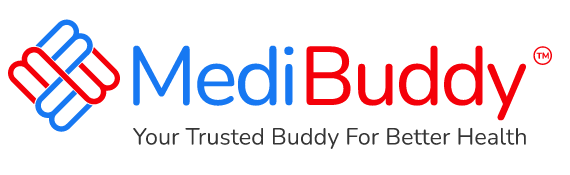](https://medibuddy.in)

[Dr. Arpitha Jacob](https://www.linkedin.com/in/arpitha-jacob-1aa4201b/) helped with corrections and improvements

## Requirements

In [1]:
#  Dev conditions:
#  Python 3.11.7
#  Pandas 2.2.0
#  numpy 1.26.4
#  Pingouin 0.5.4
#  scipy 1.12.0
#  seaborn 0.13.2
#  matplotlib 3.8.2

In [2]:
# Libraries needed to run this notebook

# !pip install pandas pingouin scipy seaborn matplotlib

In [ ]:
# Files needed to use the default examples in this notebook

# !wget https://raw.githubusercontent.com/aflip/biostats-with-python/main/data/age-bmi-sbp-data.csv
# !wget https://raw.githubusercontent.com/aflip/biostats-with-python/main/data/paired-t-test-data.csv
# !wget https://raw.githubusercontent.com/aflip/biostats-with-python/main/data/mann-whitney-eva-data.csv
# !wget https://raw.githubusercontent.com/aflip/biostats-with-python/main/data/paired-t-bp.csv

## Tests by variable type 

* Categorical vs categorical
  - [Chi Squared](#chi-squared)

* Categorical vs continuous
  - [Wilcoxon-Mann-Whitney](#wilcoxon–mann–whitney-wilcoxon-rank-sum-test) (Independent groups)
  - [Wilcoxon Signed Rank](#wilcoxon-signed-rank-test) (Related or paired groups)
  - [Independent t-test](#independent-t-test)
  - [Paired t-test](#paired-t-test)
  - [Ancova](#ancova)
  - [Anova](#anova)

* Continuous vs continuous
  - [Pearson's R](#pearson)
  - [Spearman's Rank](#spearmans-rank-correlation)
  - [Wilcoxon Signed Rank](#wilcoxon-signed-rank-test)
  - [Student's t-test](#students-t-test-or-1-sample-t-test)

## Non parametric

In the context of biomedical research and biostoatistics, Non parametric tests are those that do not make or need some assumptions about the population or distributions involved. Eg. The assumption of normality. At large sample sizes, the power of a non parametric test is the same as that of a parametric test. At smaller sample sizes, they allow us to consider hypothesis that the requirements for parametric tests would not allow. These also allow us to test categorical data. 

An alternative way to define non parametric tests is that the exact sampling distribution (t, chi etc.) can be obtained without requiring knowledge of the joint probability distribution of X and Y. 

### Pearson

Type: Parametric

Applied on: Continuous (interval or ratio) independent variable and continuous dependent variable.

Talk: In this test we determine the strength of linear association between the outcome variable ($x$) and independent predictor  variable ($y$). The test assumes a linear relationship.

Range: $-1 <= r <= 1$

A positive $r$ indicates a positive relationship (x increases as y increases) and if the two are not correlated the $r$ would be 0.  

$r = \frac{\Sigma(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\Sigma(x_i - \bar{x})^2\Sigma(y_i - \bar{y})^2}}$

The formula is  covariance divided by the product of standard deviations,  so it is essentially a normalized measurement of the covariance. As with covariance itself, the measure can only reflect a linear correlation of variables, and ignores and misfires for other types of relationships or correlations. This is **important** because if the relationship is non linear you may still get get a strong r but is meaningless.

Significance values and confidence intervals can be calculated from an r using various methods.

Always do a scatter plot, but do not conclude purely visually

Null Hypothesis: $h_0$: There is no correlation between the two


Assumptions:


1. The variables are related linearly 

Non linear relationships can make interpreting r difficult. Here are some visual examples. from [wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

![](assets/20240218_184919_non-linear-corr-wikipedia.png)

**Interpretation**

The interpretation depends on the scientific field. Because different standards apply. The original Coehn's recommendations were

- r ≈ 0.10: small effect.
- r ≈ 0.30: moderate effect.
- r ≈ 0.50: large effect.

Alternately: 

| r | 	Strength of correlation|
|---|---|
0.0 > 0.1 | 	no correlation
0.1 > 0.3 |	weak correlation
0.3 > 0.5 |	medium correlation
0.5 > 0.7 |	high correlation
0.7 > 1 |very high correlation

Depending on the type of study, other tests like bootstrapped estimations, Fisher’s z calculation etc. might be needed


Limitations:

- Correlation depends on the range of the data so that larger ranges lead to larger correlations. This can lead to vary strange interpretations


Extra:



Correlattion =/=  Agreement. When measuring the correlation between two observations on the same phenomenon using different methods, it is important to differentiate correlation from agreement. eg. QC scores between different agents or spirometry vs peak flow meter. Since pearson's is commonly used to compare different tests, it is good to be aware of this and measure them using other methods.


Read more:

1. [BBR: Correlations](https://hbiostat.org/bbr/corr)
2. [Meta Analysis in R: Effect Sizes](https://bookdown.org/MathiasHarrer/Doing_Meta_Analysis_in_R/effects.html)

Dataset: 

Hidaka T, Kasuga H, Endo S, Masuishi Y, Kakamu T, Takeda A, et al. Are lifestyle pattern changes associated to poor subjective sleep quality?: a cross-sectional study by gender among the general Japanese population underwent specified medical checkups in 2014 and 2015. Zenodo; 2020.


In [5]:
import pandas as pd

df = pd.read_csv("age-bmi-sbp-data.csv")

This dataset gives us blood pressures, fasting blood glucose hba1c, smoking status and other information about a sample population. This is derived from the dataset linked above, and only contains values taken at baseline, in 2014. What we will do here is to investigate the baseline correlations.

In [6]:
df.head()

,id,gender,2014Age,2014BMI,2014SBP,2014DBP,2014FPG,2014HbA1c,2014smoking
0,3,1,64,24.2,170,90,138.0,6.0,2
1,9,1,72,21.4,110,64,95.0,5.4,2
2,14,1,63,23.5,116,70,94.0,5.3,1
3,16,1,66,24.3,105,74,103.0,5.4,2
4,18,1,72,25.7,130,70,101.0,5.7,2


When the dataset is small and well structured, this is a good way to get an overall picture.

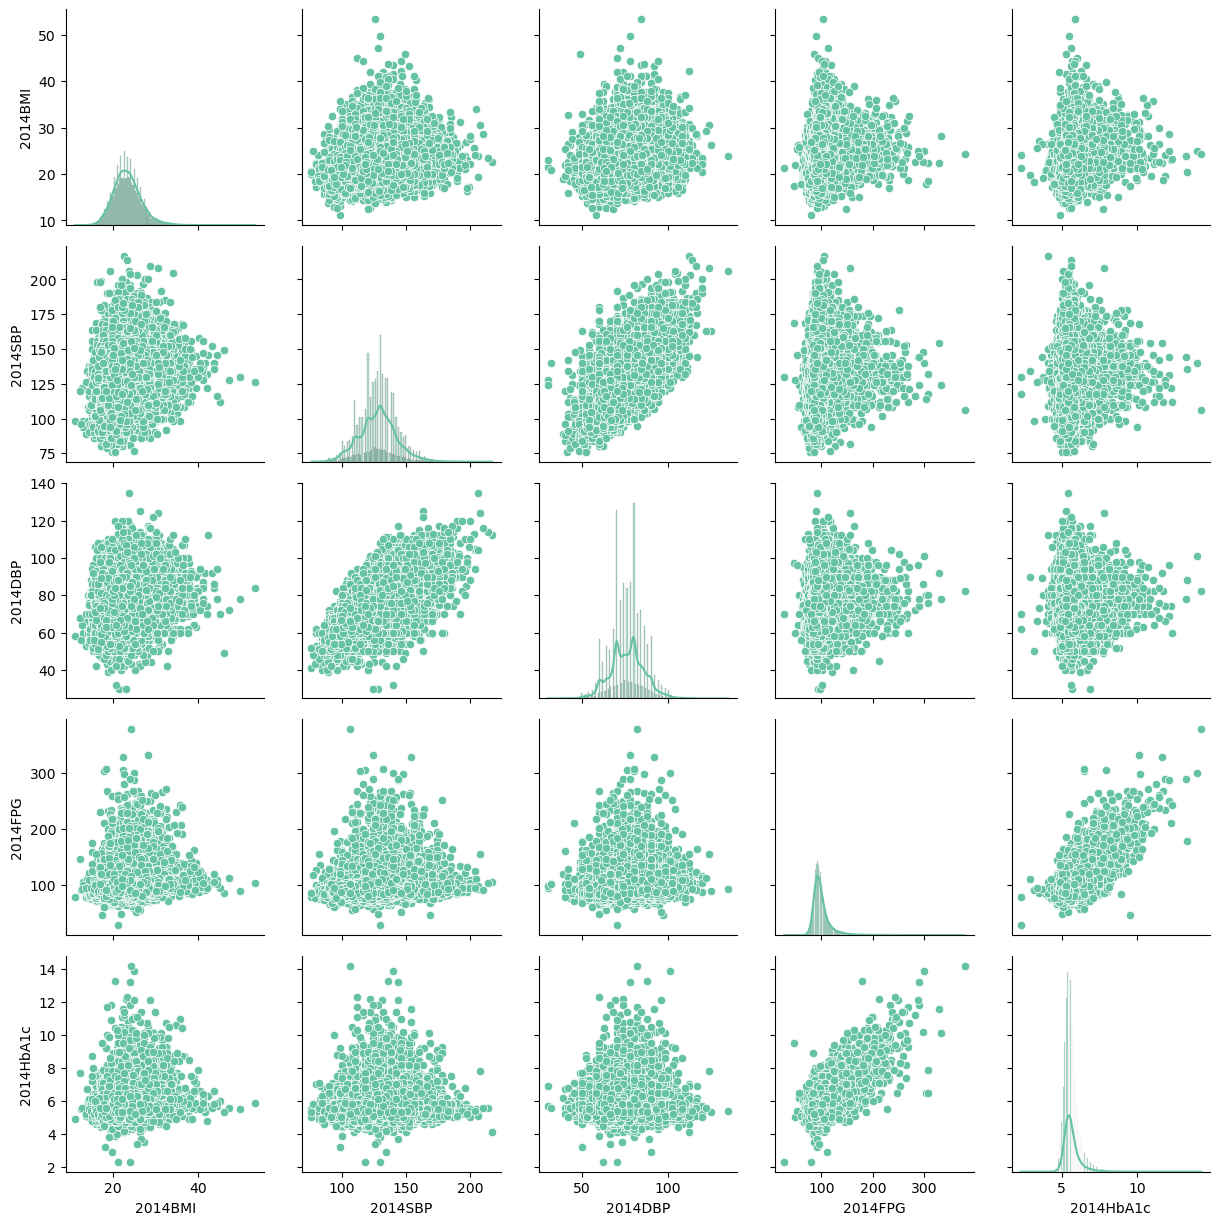

In [7]:
import seaborn as sns

sns.set_palette("Set2")

g = sns.PairGrid(df[["2014BMI", "2014SBP", "2014DBP", "2014FPG", "2014HbA1c"]])
g.map_diag(sns.histplot, kde=True)  # sets what will be the diagonal
g.map_offdiag(sns.scatterplot)

Visually, the 2014HbA1c seems correlated with the 2014FPG, the distribution of BMI appears normal. What else?

Let's see if the blood pressure and BMI are correlated

In [8]:
import scipy.stats as stats

stats.pearsonr(x=df["2014SBP"], y=df["2014BMI"])

PearsonRResult(statistic=0.2075587788303957, pvalue=0.0)

A correlation of 0.2 is seen, which means there is a weak positive correlation between the two. 
In Python, if the p value is very small, the p value shows up as 0.0.  
For practical purposes this can be reported as p <0.0000001

Exercise:  Which variables do you think would be positively correlated? Draw histograms and do correlations to see if true.

Pandas allows us to run correlations on the entire dataset and with seaborn we could plot the whole thing as a heatmap

In [9]:
df.corr()

,id,gender,2014Age,2014BMI,2014SBP,2014DBP,2014FPG,2014HbA1c,2014smoking
id,1.000000,-0.107238,-0.140646,0.066077,0.025006,0.056320,0.093893,-0.037453,-0.045123
gender,-0.107238,1.000000,-0.026324,-0.144869,-0.110618,-0.158681,-0.189004,-0.038417,0.265688
2014Age,-0.140646,-0.026324,1.000000,-0.011325,0.182881,-0.016351,0.093073,0.123198,0.124332
2014BMI,0.066077,-0.144869,-0.011325,1.000000,0.207559,0.202590,0.210351,0.198723,0.023227
2014SBP,0.025006,-0.110618,0.182881,0.207559,1.000000,0.648800,0.163331,0.076390,0.021739
2014DBP,0.056320,-0.158681,-0.016351,0.202590,0.648800,1.000000,0.085319,0.005988,-0.002997
2014FPG,0.093893,-0.189004,0.093073,0.210351,0.163331,0.085319,1.000000,0.723343,-0.022481
2014HbA1c,-0.037453,-0.038417,0.123198,0.198723,0.076390,0.005988,0.723343,1.000000,0.005497
2014smoking,-0.045123,0.265688,0.124332,0.023227,0.021739,-0.002997,-0.022481,0.005497,1.000000


<Axes: >

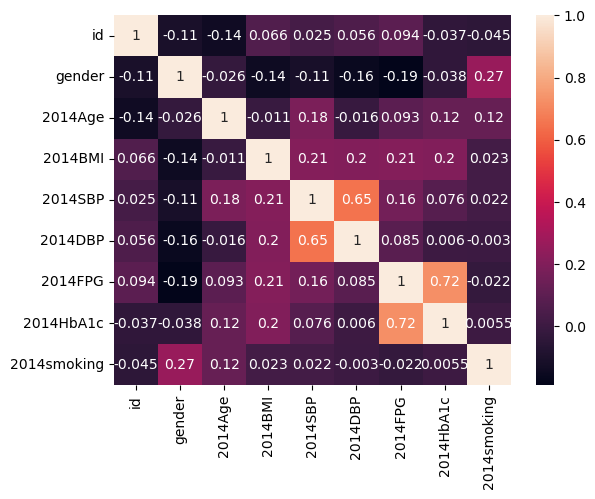

In [10]:
sns.heatmap(df.corr(), annot=True)

A strong positive correlation between FPG and hba1c and sbp and dbp are seen. Everything else has lower correlations, but there is a positive correlation between BMI and HbA1c as we expect.

### Spearman's rank correlation

Type: Non parametric ranking correlation test

Applied on: Ordinal independent variable and an ordinal dependent variable.

Talk: 

Spearman’s $\rho$ (sometimes labeled $r_s$) assumes a monotonic relationship between $X$ and $Y$ , not a linear (as opposed to pearson's $r$)

A monotonic relationship is where

1. When X increases, Y always increases, or always decreases or stays flat.
2. The rate at which an increase or decrease occurs does not have to be the same for both variables.
3. The relationship could be linear or non linear.

$h_0: $ There is no correlation between the two variables $\rho=0$

From this a t statistic can be calculated, and the p values can be computed. 

$t = \frac{\rho\sqrt{n-2}}{\sqrt{1-\rho^{2}}}$

Read more: 
1. [BBR:Spearman's Correlation](https://hbiostat.org/bbr/corr#spearmans-rank-correlation)
2. [Stack Exchange: Spearman's and Kendall Tau ](https://stats.stackexchange.com/questions/415131/minimum-sample-size-for-spearmans-correlation-and-kendalls-tau-b)
3. [Wikipedia](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)



In [11]:
# First, modelling with a random generated dataset

import random

age = []
for i in range(10000):
    age.append(random.randint(18, 100))

smoking = []
for i in range(10000):
    smoking.append(random.randint(0, 4))

# smoking ranks :
# 0= Never smoked,
# 1 = used to smoke,
# 2 = smoke less than a pack a day ,
# 3 = smoking a pack a day,
# 4 = smoking more than a pack a day

In [12]:
import pandas as pd

df_random = pd.DataFrame({"age": age, "smoking": smoking})

In [13]:
import scipy.stats as stats

stats.normaltest(df_random["age"])  # not a normal dist

NormaltestResult(statistic=8448.011390155185, pvalue=0.0)

In [14]:
data1 = df_random["age"]
data2 = df_random["smoking"]


coef, p = stats.spearmanr(data1, data2)

coef, p

(-0.00621671431731578, 0.5342051023681593)

Spearmans correlation coefficient: -0.01309

p=0.1905 > alpha

Samples are uncorrelated (fail to reject $h_0$)

In [15]:
# Real World dataset

import pandas as pd
import scipy.stats as stats

df = pd.read_csv("age-bmi-sbp-data.csv")
df.head()

,id,gender,2014Age,2014BMI,2014SBP,2014DBP,2014FPG,2014HbA1c,2014smoking
0,3,1,64,24.2,170,90,138.0,6.0,2
1,9,1,72,21.4,110,64,95.0,5.4,2
2,14,1,63,23.5,116,70,94.0,5.3,1
3,16,1,66,24.3,105,74,103.0,5.4,2
4,18,1,72,25.7,130,70,101.0,5.7,2


In [16]:
data1 = df["2014Age"][:5000]
data2 = df["2014smoking"][:5000]


coef, p = stats.spearmanr(data1, data2)
coef, p

(0.13033529753985648, 2.1769251455759564e-20)

Spearmans correlation coefficient: -0.130

p = 2.1769251455759564e-20 << alpha

Samples are correlated (reject $h_0$)

### Chi-Squared

Type: Non-parametric

Applied to: Categorical independent variable and a categorical dependent variable

Talk: 

Sometimes the variables you need to test for independence are both categorical. 
This test looks at if two or more categorical variables are related

Eg. You  gave subjects mushrooms and measured if they got high, or not. The test was done for two groups, one has had previous exposure to psychedelic drugs and the other did not. Now if you want to know if people got high irrespective of the previous exposure, this test comes in handy. 

But the test does not give us a way to verify a directional hypothesis. That is, chi-square value can not tell you **what** the relationship is between two variables, only that a relationship exists between the two variables. There is only a right tail on a chi-square distribution.  

The test computes the expected frequencies assuming that the two variables were not correlated, and then compares this with the  observed frequencies in your sample. Correlation is run on this to get the chi statistic. 

Null Hypothesis:

$h_0$:  There is no relationship between x and y.  $\space\chi^2 = 0$


Assumptions:

1. The total number of samples is greater than 13, otherwise exact tests (such as Barnard’s Exact test) should be used
2. There are at least 5 observations **expected** per category (with low $n$, $\space\chi^2$ will miss existing relationships)
3. The sum of the observed ( $o_e$) and expected frequencies ( $f_e$) must be the same


Limitations:

1.  Heavily influenced by n.  As n increases, chi-square increases, independent of the relationship between x and y. At large numbers you will likely find statistically significant relationships when in reality there is no  relationship (False Positives). With small numbers might not find statistically significant relationships even if they exist (False Negatives).

2. Sensitive to small expected frequencies.  If $f_e<5$ in 1 or more cells, chi-square is unreliable. 


Read More: [Robert Lowry Chi-Square Procedures for the Analysis of Categorical Frequency Data](https://web.archive.org/web/20171022032306/http://vassarstats.net/textbook/ch8pt1.html)


Extra: 

This test can be used to 

1. Evaluate the quality of a categorical variable in a classification problem 
2. Check the similarity between two categorical variables. 


- A good categorical predictor and the class column should present high $\space\chi^2$ and low p-value. 
- Dissimilar categorical variables should present high $\space\chi^2$ and low p-value.


From [Pingouin Docs](https://pingouin-stats.org/build/html/generated/pingouin.chi2_independence.html#pingouin.chi2_independence)

In scipy, the path to getting the relevent info is a bit circuitous, but can be accessed via `scipy.stats.chisquare`, Here I am using `Pingouin` instead

In [17]:
import pingouin as pg

data = pg.read_dataset("chi2_independence")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
data.target.value_counts()  # in this dataset, `target` is the presense and absence of cardiovascular disease, expressed as a category.

target
1    165
0    138
Name: count, dtype: int64

In [19]:
data.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

Let's say our hypothesis is that gender and the target are interacting or have some correlation.

In [20]:
expected, observed, stats = pg.chi2_independence(data, x="sex", y="target")

If gender and heart disease status were un correlated we would see these frequencies.

[Robert Lowry Chi-Square Procedures](https://web.archive.org/web/20171022032306/http://vassarstats.net/textbook/ch8pt1.html) Provides the method this is calculated in detail. 

In [21]:
expected  

target,0,1
sex,,
0,43.722772,52.277228
1,94.277228,112.722772


In [22]:
observed  # more male cases seem to be having the target than expected

target,0,1
sex,,
0,24.5,71.5
1,113.5,93.5


In [23]:
43.722 + 52.277 + 94.277228 + 112.722772  # sum exp

302.999

In [24]:
24.5 + 71.5 + 113.5 + 93.5  # sum obs

303.0

In [25]:
stats  # the p values are all very low, with great power (comes great responsibility).

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,22.717227,1.0,1.876778e-06,0.273814,0.997494
1,cressie-read,0.666667,22.931427,1.0,1.678845e-06,0.275102,0.997663
2,log-likelihood,0.000000,23.557374,1.0,1.212439e-06,0.278832,0.998096
3,freeman-tukey,-0.500000,24.219622,1.0,8.595211e-07,0.282724,0.998469
4,mod-log-likelihood,-1.000000,25.071078,1.0,5.525544e-07,0.287651,0.998845
5,neyman,-2.000000,27.457956,1.0,1.605471e-07,0.301032,0.999481


Given that p < alpha, we reject the null hypothesis that gender and heart disease are uncorrelated. Gender is a good predictor. 

$\chi^2$ tests also have critical values, which can be looked up in a table online. But if the p vaues are all  < alpha $\chi^2$ will be more than the critical values. So we can reject the $h_0$ that there is no relationship between the variables

### Wilcoxon–Mann–Whitney (Wilcoxon rank-sum test)

Type: Non parametric



Applied on: Two categorical (ordinal/nominal) independent variables  and a continuous dependant variable.

Talk: Let's say you have two conditions under which some observations were made (or two groups of people), and you would like to know if the observations suggest a difference of some kind between the groups. If the observations were normally distributed, an independent t-test could be used. But in case they were not, we use a MWU.

The test reports the probability that a randomly selected value from one group would be larger than a randomly selected one from the second group. This is best reported as concordance probability.


Null hypothesis:

$h_0$  : The distribution underlying sample x is the same as the distribution underlying sample y.

Assumptions:

* All the observations from both groups are independent of each other,
* The responses are ordinal or ratio




Read More:

1. [stats.stackexchange: How to choose between t-test or non-parametric](https://stats.stackexchange.com/questions/121852/how-to-choose-between-t-test-or-non-parametric-test-e-g-wilcoxon-in-small-sampl)
2. [BBR: Wilcox Mann Whitney](https://hbiostat.org/bbr/nonpar#two-sample-test-wilcoxonmannwhitney)


The dataset used below is from table 15.1 Discovering Statistics Using R by Andy Field, Jeremy Miles, Zoë Field

In this dataset, a psychiatrist studies the effect of some drugs on mood. 

- They study 20 participants
- 10 were given an ecstasy tablet to take on a Saturday night (day 0) and 
- 10 were allowed to drink only alcohol.
- Levels of depression were measured for both groups using the Beck Depression Inventory (BDI) on day 1 and day 4. 

We would like to know if there is any statistically difference in the BDI scores on day 1 and day 3, split across the two groups. 
eg. Did Ecstacy make mood worse or better? 

our $h_0$ is that there is no difference between the two groups on day 3 or day 1 

In [26]:
import pandas as pd

df = pd.read_csv(
    "mann-whitney-eva-data.csv",
)

In [27]:
df.head()

,Participant,Drug,BDI_Sunday,BDI_Wednesday
0,1,Ecstasy,15,28
1,2,Ecstasy,35,35
2,3,Ecstasy,16,35
3,4,Ecstasy,18,24
4,5,Ecstasy,19,39


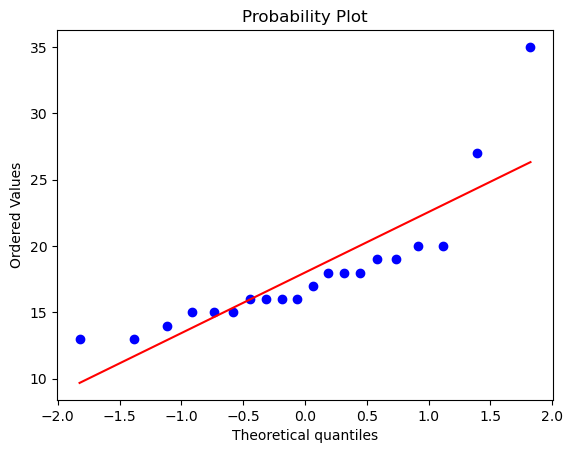

In [28]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(
    df["BDI_Sunday"], dist="norm", plot=plt
);  # the colon skips printing the data

# this is ~ a q-q plot and there are outliers

# Todo why this plot and what's a better plot

In [29]:
x_s = df[df["Drug"] == "Ecstasy"]["BDI_Sunday"]
y_s = df[df["Drug"] == "Alcohol"]["BDI_Sunday"]

stats.mannwhitneyu(x_s, y_s)

# the differences on BDI sunday are not significant.

MannwhitneyuResult(statistic=64.5, pvalue=0.28608212723292936)

In [30]:
import pingouin as pg

pg.mwu(x_s, y_s)

# P value > Alpha. Accept the null hypothesis, the distributions are identical on day 1

,U-val,alternative,p-val,RBC,CLES
MWU,64.5,two-sided,0.286082,-0.29,0.645


In [31]:
x_w = df[df["Drug"] == "Ecstasy"]["BDI_Wednesday"]
y_w = df[df["Drug"] == "Alcohol"]["BDI_Wednesday"]

stats.mannwhitneyu(x_w, y_w)

MannwhitneyuResult(statistic=96.0, pvalue=0.0005690342182204761)

p-value < alpha, reject the null hypothesis, the sample differs on day 4.

In addition to the U statistic, it is useful and better to report the concordance probability (also known as probability index)

$c = U_1 /(n_1 * n_2)$


96.0/(10*10) = 0.96


Effect size: 

If you use scipy, effect size needs to be calculated manually, if you use pingouin, the RBC (ranked biserial correlation) and the common language effect size (CLES) will give you this information.

Manually calculating the effect size.

from z score: $r = z/sqrt(N)$

from U statistic : $r=  1- (2U/n_1*n_2)$

### Wilcoxon signed-rank test

Type: Non-parametric

Applied on:  Continuous dependent variable and categorical independent variable

Let's say you have two measurements taken from the same individual, object, or related units and the data are not normal. If your data were normal, you could use the paired t-test to compare them. IN cases where the sample is not normal, we use the WSR test.  It tests whether the distribution of the differences x - y is symmetric about zero.

eg.

- A measurement taken at two different times (e.g., pre-test and post-test score with an intervention administered between the two time points)
- A measurement taken under two different conditions (e.g., completing a test under a "control" condition and an "experimental" condition)
- Measurements taken from two halves or sides of a subject or experimental unit (e.g., measuring hearing loss in a subject's left and right ears).

The procedure of the test subtracts x from y and assigns signed ranks (-1, -2, +9 etc). If the measurements are from the same individual with no effect, you expect the ranks to be more or less the same. 

A z value can be calculated from this by $z = \frac{\sum{SR_{i}}}{\sqrt{\sum{SR_{i}^{2}}}}$

and a p value can be looked up in a normal distribution `stats.norm.cdf(z)`


Null Hypothesis: 
$h_0$: There is no difference in the ranks, the  two paired samples come from the same distribution


Assumptions:

1. Random sampling from a defined population
2. Interval or ratio scale of measurement (continuous data)
3. Independent variable is two categorical, "related groups" or "matched pairs"

Read More: 
1. [BBR: One sample test](https://hbiostat.org/bbr/nonpar.html#one-sample-test-wilcoxon-signed-rank)
2. [Boston University: Non Parametric tests](https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_nonparametric/BS704_Nonparametric6.html)



In [32]:
df = pd.read_csv("paired-t-test-data.csv")
df.head()

,BDI_Sunday,BDI_Wednesday
0,28,29
1,19,28
2,30,33
3,21,25
4,19,32


In scipy When y is provided, wilcoxon calculates the test statistic based on the ranks of the absolute values of d = x - y. Roundoff error in the subtraction can result in elements of d being assigned different ranks even when they would be tied with exact arithmetic. Rather than passing x and y separately, always pass the difference x - y, rounding as needed to ensure that only truly unique elements are numerically distinct, and passing the result as x with no y.

In [33]:
df["BDI_diff"] = df.BDI_Sunday - df.BDI_Wednesday
df.head()

,BDI_Sunday,BDI_Wednesday,BDI_diff
0,28,29,-1
1,19,28,-9
2,30,33,-3
3,21,25,-4
4,19,32,-13


In [34]:
import scipy.stats as stats

stats.wilcoxon(df["BDI_diff"])

# p < alpha, reject the null hypothesis that the two are from same distribution

WilcoxonResult(statistic=348.0, pvalue=7.110924467959148e-13)

In [35]:
from math import sqrt

z = df.BDI_diff.sum() / sqrt(sum(df.BDI_diff * df.BDI_diff))
z

-7.045084942753576

In [36]:
p = 2 * (1 - stats.norm.cdf(abs(z)))
p

1.8534063173092363e-12

## Parametric

### Independent T-test 

Type: Parametric


Applied to: Two **independent** categorical variables and one continuous dependant variable.

Talk: 

This test is used when there are two experimental conditions and different participants were assigned to each condition, but the outcome variable is the same. 
Let's say we test the effect of a drug that reduced heart rates. One group you gave this to is powerlifters, the other group is badminton player. You measure the baseline heart rate and the difference from baseline at hour 2.  So does this drug lower heart rate in powerlifters more than badminton players? A statistical measure of this is the mean value. And so we are looking at the quantity of interest or $QOI = \mu_{1}-\mu_{2}$

The calculation is $t = \frac{\mathrm{point~estimate~of~QOI}}{\mathrm{se~of~numerator}}$




Null hypothesis:

$H_{0}: \mu_{1}=\mu_{2}$

The two samples are from the same population / the drug has no effect / there is no mean diff in the populations

Assumptons:

1. The sampling distribution is normally distributed.
2. Data are interval or ratio
3. Scores in different treatment conditions are independent (because they come from
different people)
4. Homogeneity of variance – in theory we assume equal variances, but in
reality we don’t

Read More:

1. [BBR: Two sample T-test](https://hbiostat.org/bbr/htest#two-sample-test-for-means)

In [37]:
import numpy as np

# as a test, I am generating a random distribution here.


mean_1, sd_1 = 120, 1  # mean and standard deviation
μ, σ = 85, 1  # standard notation


s = np.random.default_rng().normal(mean_1, sd_1, 10000)
n = np.random.default_rng().normal(μ, σ, 10000)

In [38]:
# To manually test if the data are normal
# abs(mean_1 - np.mean(s))
# abs(sd_1 - np.std(s, ddof=1))

<Axes: ylabel='Count'>

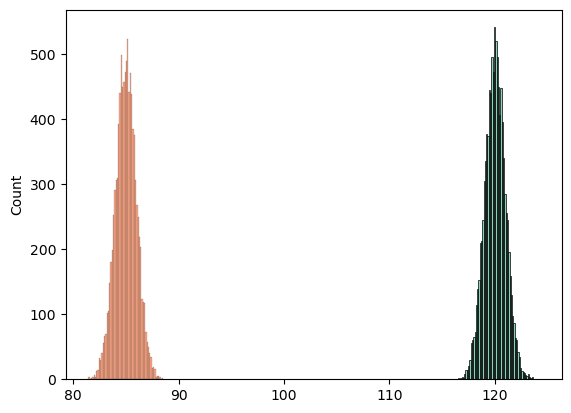

In [39]:
import seaborn as sns

sns.histplot(s)
sns.histplot(n)

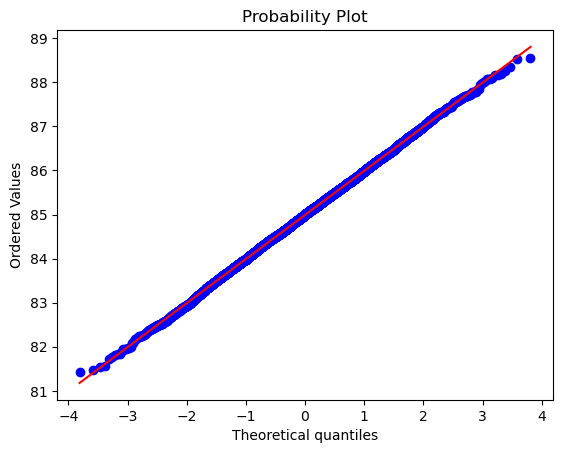

In [40]:
stats.probplot(n, dist="norm", plot=plt);

# The data is pretty uniformly distributed

In [41]:
import scipy.stats as stats

res = stats.ttest_ind(s, n)
res

TtestResult(statistic=2486.1432755104966, pvalue=0.0, df=19998.0)

In [42]:
res.confidence_interval(confidence_level=0.95)

ConfidenceInterval(low=34.98009656277974, high=35.03529690340728)

For interpreting the result, we look at the p value, if it is less than the alpha, we reject the null hypothesis.

If you want to calculate the effect size, use earlier methods, or use pg, it gives the cohen-d

given that we used a random number generator to ensure that these are infact independent, the result is not a surprise.

In [43]:
# power = 1- (2*mean)/n1*n2

r = 1 - ((2 * -138.48151) / (1000 * 1000))
r  # this will be the same as power

1.00027696302

In [44]:
import pingouin as pg

pg.ttest(s, n)

/home/darthfader/miniforge3/envs/MS-baby-311/lib/python3.11/site-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2486.143276,19998,two-sided,0.0,"[34.98, 35.04]",35.159375,inf,1.0


### Paired T-test

Parametric.


Applied to: Continuous Dependent variable and categorical independent variable 

We use a paired t-test when we have two measurements taken from the same individual, object, or related units under different conditions. A paired t-test checks if the mean change for these pairs is significantly different from zero. Let's say we come up with a pill that makes working memory  better for 10 minutes. Instead of cases and controls, we can estimate the relative effect of the pill on working memory by first testing memory at base line, and then administering the drug and retesting. Same test, done on the same individual, before and after an intervention. 

eg.

- A measurement taken at two different times (e.g., pre-test and post-test score with an intervention administered between the two time points)
- A measurement taken under two different conditions (e.g., completing a test under a "control" condition and an "experimental" condition)
- Measurements taken from two halves or sides of a subject or experimental unit (e.g., measuring hearing loss in a subject's left and right ears).

Also known as a paired sample t-test or a dependent samples t test. These names reflect the fact that the two samples are paired or dependent because they are of the same subjects.

Procedure:  we  first subtract the pre-treatment value from the post-treatment value for each subject, this gives us the differences in the values. Then we compare these differences to zero.

$t\ =\ \cfrac{\mu{_d}\ -\ 0}{\hat{\sigma}/\sqrt{n}}$

where $\mu{_d}$ is the sample mean of the differences, and $\sigma$ is the standard deviation of these differences. 

Remember that $\sigma/\sqrt{n}$ gives us the standard error of the mean

Null Hypothesis: 

$h_0:\mu{_d}=0$

Assumptions:

1. Random sampling from a defined population
2. Interval or ratio scale of measurement (continuous data)
3. Population is normally distributed

Read More:
1. [Directory of statistical Analysis](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/paired-sample-t-test/)
2. [Kent State University: Paired T test](https://libguides.library.kent.edu/spss/pairedsamplesttest)

In [45]:
df = pd.read_csv("paired_t_bp.csv")

In this dataset, we gave a drug to people and checked baseline mean BP and after 3 hours. 

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   base_bp      10000 non-null  float64
 1   post_drg_bp  10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


<Axes: >

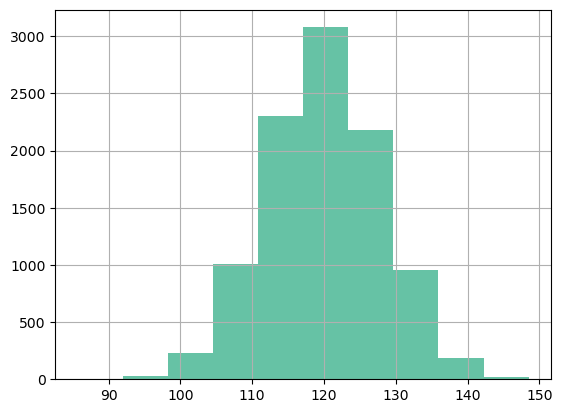

In [47]:
df.base_bp.hist()

In [48]:
# test if the data are normal

import scipy.stats as stats

print(stats.normaltest(df["base_bp"]))
print(stats.normaltest(df["post_drg_bp"]))

# p > alpha, data are  normal

NormaltestResult(statistic=1.4720610341243716, pvalue=0.47901157493967916)
NormaltestResult(statistic=1.0681931715578785, pvalue=0.5861986311814571)


In [49]:
print(
    "base Mean:",
    round(df["base_bp"].mean()),
    "post drug Mean:",
    round(df["post_drg_bp"].mean()),
    "Expected Mean Difference:",
    0,
    "Observed Mean Difference:",
    (df["base_bp"].mean() - df["post_drg_bp"].mean()),
)

base Mean: 120 post drug Mean: 110 Expected Mean Difference: 0 Observed Mean Difference: 9.865290000000002


In [50]:
import scipy.stats as stats

stats.ttest_rel(df["base_bp"], df["post_drg_bp"])

TtestResult(statistic=85.77186477218346, pvalue=0.0, df=9999)

p < alpha, reject null hypothesis that there is no mean difference. Whichever drug was used, it changes the mean bp

The results are statistically significant. Our sample data support the notion that the average paired difference does not equal zero. Specifically, the post drug mean is lower than the basal mean.

In [51]:
import pingouin as pg

pg.ttest(df["base_bp"], df["post_drg_bp"], paired=True)

/home/darthfader/miniforge3/envs/MS-baby-311/lib/python3.11/site-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,85.771865,9999,two-sided,0.0,"[9.64, 10.09]",1.22507,inf,1.0


bf10 uses a bayesian method to calculate the stat and can be ignored.  the p is too small, this causes the error

### Student's t-Test or  1-sample T-test

Type: Parametric

Applied to: Continuous dependant variable, compared to the mean for the population (IV).

Talk: If you would like to know if the sample observations are from the X population whose mean is **known**. Or, is there a difference between this group and the population.

eg. We have measured the heights of 30 people in the office, and want to know if the average height in the office  $\hat x$,  that matches the average heights of indians $\mu_0$.

$t_{calc} = \frac{\bar{x} - \mu_{0}}{se_{\hat x}}$

where ${se_{\hat x}}$ is the standard error of our observations ${\hat x}$

After you get a t value, you need to look up the critical value from a table, for the corresponding degree of freedom, and if    $\space t_{calc} \space > t_{crit}\space $,    we can reject the null hypothesis.

One thing to remember in this test is that rejecting the null hypothesis is often the  "bad" outcome in the student's T

Null Hypothesis:

The $h_0$ is that $\hat x = \mu_0$


Assumptions:

1. Random sampling from a defined population
2. Interval or ratio scale of measurement
3. Population is normally distributed



Read More:

1. [BBR: One sample test for Mean](https://hbiostat.org/bbr/htest.html#one-sample-test-for-mean)
2. [Statistics How to: 1 sample t-test](https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/one-sample-t-test/#example)

In [52]:
import numpy as np

rng = np.random.default_rng()

# Making a random dataset of 300 observations

height_1 = rng.integers(140, 180, 300)  # samples integers uniformly

In [53]:
np.mean(height_1)

160.35

In [54]:
from scipy import stats


POP_MEAN = 158.5  # from average heights of indians, wikipedia

# perform one sample t-test

stats.ttest_1samp(a=height_1, popmean=POP_MEAN)

TtestResult(statistic=2.74954487960015, pvalue=0.0063311279678636674, df=299)

p > alpha, accept the null hypothesis

meaning our sample mean is from the same population as the general Indian population

In [55]:
pg.ttest(height_1, POP_MEAN)  # Gives us the power and the Cohen-D

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.749545,299,two-sided,0.006331,"[159.03, 161.67]",0.158745,2.612,0.782523


We redid the test at the Amsterdam office, and want to know if that has the same mean as the indian office. 

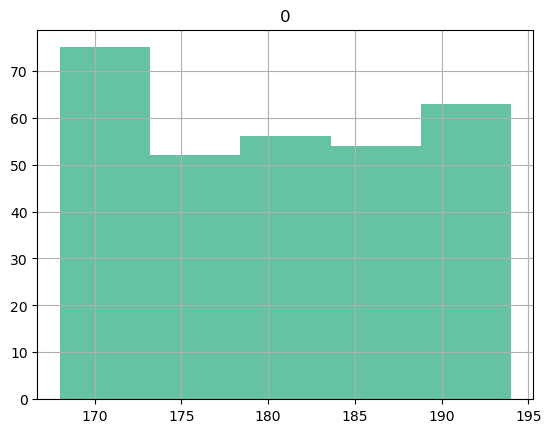

In [56]:
height_2 = rng.integers(168, 195, 300)

pd.DataFrame(height_2).hist(bins=5);

In [57]:
stats.ttest_1samp(a=height_2, popmean=POP_MEAN)

TtestResult(statistic=48.735063956440214, pvalue=2.747487708524111e-144, df=299)

p < alpha.  Reject the null hypothesis, our observed sample mean is not from the same population as  India and our amsterdam office needs more diversity. Or taller tables. 

### Anova

Type: Parametric

Applied to:

- DV = continuous
- IV = categorical with more than 2 categories, usually 3-6 categories, nominal or ordinal (It gets very confusing when there are more than 6)



Rationale:

In some studies we may want to look at how different groups of patients or subjects differ with regards to the dependant variable or the outcome.
If there are just two such groups, we can use the student's t-test. But if multiple groups are present, we use Anova. 

The groups may be in the same categorical variable, or in different categorical variables. 

Eg. The pain tolerance of people with 0, 3, 6 or 10 tattoos was measured. Now we want to know if besides the number of tattoos, the gender made any difference. In the first case we have one categorical variable, presense of tattoos, with four groups. IN the second case we have four groups in category one, and two groups in category two. 


Null hypothesis:

$h_0$: There is no effect of the IV on the DV


Assumptions for doing an anova

1. The groups should be independent (comparison is to be between groups, not within subjects)
2. The data should be normally distributed, if small sample (<30 observations per group), in larger samples this doesn't matter  so much. Normality should be checked for each category of the IV
3. The groups should have equal variance (homoscedasticity). Check using box plots /stripplots or Levene Test and do a welch anova if unequal variance. 
4. There should not be any major outliers

Note:

When the ANOVA is significant, post hoc tests are used to see differences between specific groups. Post hoc tests control the family-wise error rate (inflated type I error rate) due to multiple comparisons. They adust the p values (Bonferroni correction) or critical value (Tukey’s HSD test).

Read More:
1. [Jammie Price : Anova](https://people.uncw.edu/pricej/teaching/statistics/anova.htm)
2. [Biostatistics for research: Two Way anova](https://hbiostat.org/bbr/multgroup.html#two-way-anova)
3. [Handbook of Biological statistics: One Way Anova](http://www.biostathandbook.com/onewayanova.html)
4. [Wikipedia: Multiple comparisons](https://en.wikipedia.org/wiki/Multiple_comparisons_problem)
5. [Chen, S. Y et al. A general introduction to adjustment for multiple comparisons. Journal of thoracic disease, 9(6), 1725–1729](https://doi.org/10.21037/jtd.2017.05.34)

In [58]:
import pandas as pd
import pingouin as pg

df = pg.read_dataset("anova")  # built-in dataset in pingouin

# In this dataset they tested people's pain threshold and tried to see if the hair color of the subject made any difference to the thresholds.

In [59]:
df.head()

,Subject,Hair color,Pain threshold
0,1,Light Blond,62
1,2,Light Blond,60
2,3,Light Blond,71
3,4,Light Blond,55
4,5,Light Blond,48


In [60]:
df.rename(
    columns={"Hair color": "hair_color", "Pain threshold": "pain_threshold"},
    inplace=True,
)

# Just to make it easier to index into

Box plots are everywhere and some care must be taken in interpreting them: [Read more](https://www.data-to-viz.com/caveat/boxplot.html)

<Axes: xlabel='hair_color', ylabel='pain_threshold'>

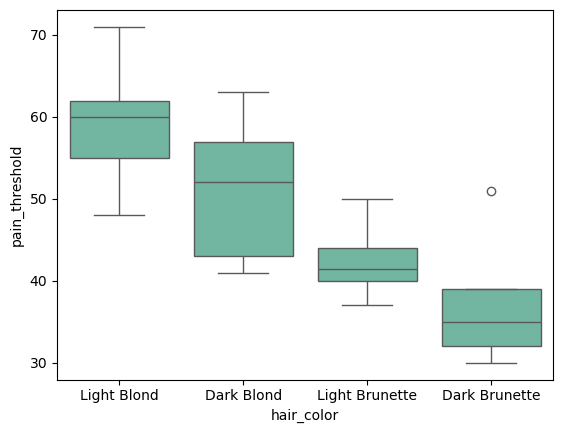

In [61]:
import seaborn as sns

sns.boxplot(data=df, x="hair_color", y="pain_threshold")

Visualizing the data helps us get a rough idea of the distribution. in this case the values are distributed evenly, but box plots confuse me so I recommend using strip plots or violin plots

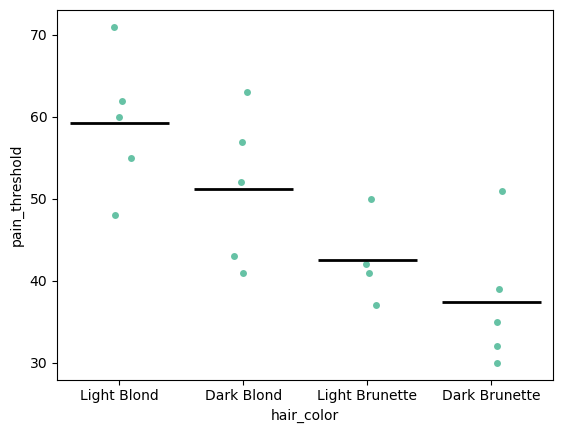

In [62]:
import matplotlib.pyplot as plt

""" 
    This first plots a strip plot, then draws a line at the mean of each group, by plotting a box plot on top of the strip plot but then not showing the boxes. Sadly this is the easiest way to do this in python
    
"""
p = sns.stripplot(data=df, x="hair_color", y="pain_threshold")


sns.boxplot(
    data=df,
    x="hair_color",
    y="pain_threshold",
    showmeans=True,
    meanline=True,
    meanprops={"color": "k", "ls": "-", "lw": 2},
    medianprops={"visible": False},
    whiskerprops={"visible": False},
    zorder=10,
    showfliers=False,
    showbox=False,
    showcaps=False,
    ax=p,
)
plt.show()

<Axes: xlabel='hair_color', ylabel='pain_threshold'>

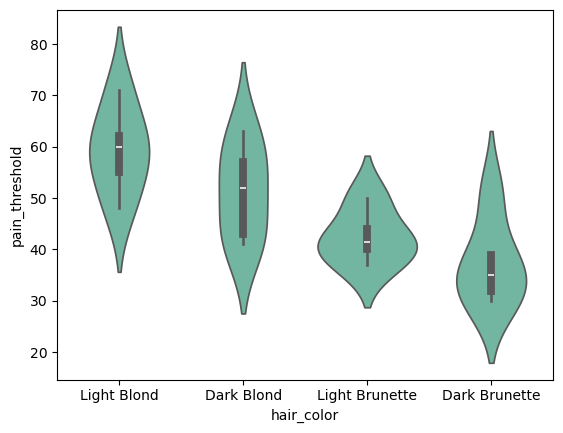

In [63]:
sns.violinplot(data=df, x="hair_color", y="pain_threshold")

In [64]:
pg.normality(df, group="hair_color", dv="pain_threshold")

,W,pval,normal
hair_color,,,
Light Blond,0.991032,0.983181,True
Dark Blond,0.939790,0.664457,True
Light Brunette,0.930607,0.597974,True
Dark Brunette,0.883214,0.324129,True


Tests of normality Caveats:

Keep in mind that when the sample size is small, the test for normality may not have enough power to make an accurate prediction. This is true for all the parametric tests we do. 

Also, very few, if any, real world data are perfectly normal. Most of the time we are trying to predict the mean, and not the extremes, and so it doesn't really matter, because in large samples the means will be normally distributed (central limit theorum). 

Non Parametric tests are robust to outliers and large sample sizes, and are a good alternative when there is ambiguity about the normality of the data.

In [65]:
import scipy.stats as stats

stats.f_oneway(
    df["pain_threshold"][df["hair_color"] == "Light Blond"],
    df["pain_threshold"][df["hair_color"] == "Light Brunette"],
    df["pain_threshold"][df["hair_color"] == "Dark Brunette"],
    df["pain_threshold"][df["hair_color"] == "Dark Blond"],
)

# I prefer the pingouin output because it gives more information

F_onewayResult(statistic=6.791407046264094, pvalue=0.00411422733307741)

In [66]:
aov = pg.anova(dv="pain_threshold", between="hair_color", data=df, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,hair_color,1360.726316,3,453.575439,6.791407,0.004114,0.575962
1,Within,1001.800000,15,66.786667,NaN,NaN,NaN


The hair color has a p > alpha, so we reject the null hypothesis. Hair color has been shown to have an effect. 

The eta squared (np2) indicates that 57.59% of the variance in pain thresholds can be explained by the hair color!! 

If there were more than one grouping variable, say, they also collected the gender and if the person was right handed or left handed, this could also be computed using an anova. And if there were other factors that could affect pain threshold, we would test them using an [ancova](#ancova)

The number of groups helps us name the test. In the present experiment, we have done an 1-way anova, because
there is one grouping variable. If there were 4 grouping variables, it would be a 4-way anova

Calculating the power of the study

In [67]:
num_groups = df["hair_color"].nunique()

ob_per_group = df.shape[0] / num_groups  # Mean number of observations per group


achieved_power = pg.power_anova(
    eta_squared=aov.loc[0, "np2"], k=num_groups, n=ob_per_group, alpha=0.05
)
print("Achieved power: %.4f" % achieved_power)

# you can also look up the F Stat significance in tables available online

Achieved power: 0.9729


Calculating the power of the study if this were particle physics, where the alpha is much much smaller

In [68]:
num_groups = df["hair_color"].nunique()
ob_per_group = df.shape[0] / num_groups  # Mean number of observations per group


achieved_power = pg.power_anova(
    eta_squared=aov.loc[0, "np2"], k=num_groups, n=ob_per_group, alpha=0.00000057
)
print("Achieved power: %.4f" % achieved_power)

# If you fiddle around with the alpha, you would see how much the power varies

Achieved power: 0.0089


Read more about the selection of alpha and its effects and how to pick a good alpha here:
[Miller, J., & Ulrich, R. (2019). The quest for an optimal alpha. PloS one, 14(1), e0208631.](https://doi.org/10.1371/journal.pone.0208631)


### Ancova

Type: Parametric

Applied to:  

- Dependant Variable = continuous
- Independent Variable = categorical with 2 or more categories (nominal or ordinal)
- CoVariates = continuous



Rationale:

In many studies we are trying to make changes to or predict the changes to a dependant variable (DV) using an independent variable (IV). eg. Weight is being modified by total calorie intake or test scores being modified by the type of teaching method. In these situations, there could be other variables that also have an effect on the dependant variable. eg. In case of Weight, maybe the BMR of the patient matters. In case of the test scores maybe poverty matters. These are called the covariates (CV) of the DV. These contribute to the outcome heterogeneity. 

If we want to know the precise effect of the intervention (IV) like calorie restriction, and we do not account for all the things that make a difference to the dependant variable, we will have lower power and a less accurate result. Measuring the covariance maximizes power and precision. 

So to know how much of the change (variance) in the DV is being caused by these covariates, we need to break the overall variance down and separate out the variance caused by the covariates from the variance caused by the IV. 

If the covariates are continuous variables, the test we use is Ancova, which is an ANOVA+regression.  Ancova also gives us the statistical power of the test.


ANCOVA decomposes the variance in the DV into

1. Variance explained by the covariates,
2. Variance explained by the categorical independent variable, and
3. Residual variance.

Overall, what we are trying to do is answer if patient A got treatment X instead of treatment Y, by how can we expect them to differ in outcomes. This  effect is composed of the effect of the treatment, effect of covariates and residuals (unknowns).  


Null Hypothesis:

$h_0$ : There is no relationship between the IV and the DV, controlling for the covariates

Assumptions:

1. A normal distribution of the covariates and dependant variable values in the sample.
2. Each category/group that is being looked at should have at least 30 cases.
3. The covariate and the treatment are independent (In experiemental studies)
4. At each level of categorical independent variable, the covariate should be linearly related to the dependent variable (if the relationship is non linear, it reduces the power of the study)
5. Equality of variances (Homoscedasticity)

Read More:  

1. [Biostats for Biomedical Research : Ancova](https://hbiostat.org/bbr/ancova)
2. [Stats  and R: Anova in R](https://statsandr.com/blog/anova-in-r/)
3. [When Assumptions of ANCOVA are Irrelevant](https://www.theanalysisfactor.com/assumptions-of-ancova/)
4. [ANCOVA Assumptions: When Slopes are Unequal](https://www.theanalysisfactor.com/ancova-assumptions-when-slopes-are-unequal)



Dataset: We are using Pingouin's inbuilt ancova dataset. In this study, they randomized students into different teaching methods and measured the scores. They also measured the BMI of the students and the Income. Our hypothesis here is the method has a significant effect on the scores, but we also want to know if other things like income and BMI have any role. 

In [69]:
import numpy as np
import pandas as pd
import pingouin as pg


df = pg.read_dataset("ancova")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Scores  36 non-null     int64  
 1   Income  36 non-null     float64
 2   BMI     36 non-null     int64  
 3   Method  36 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.3+ KB


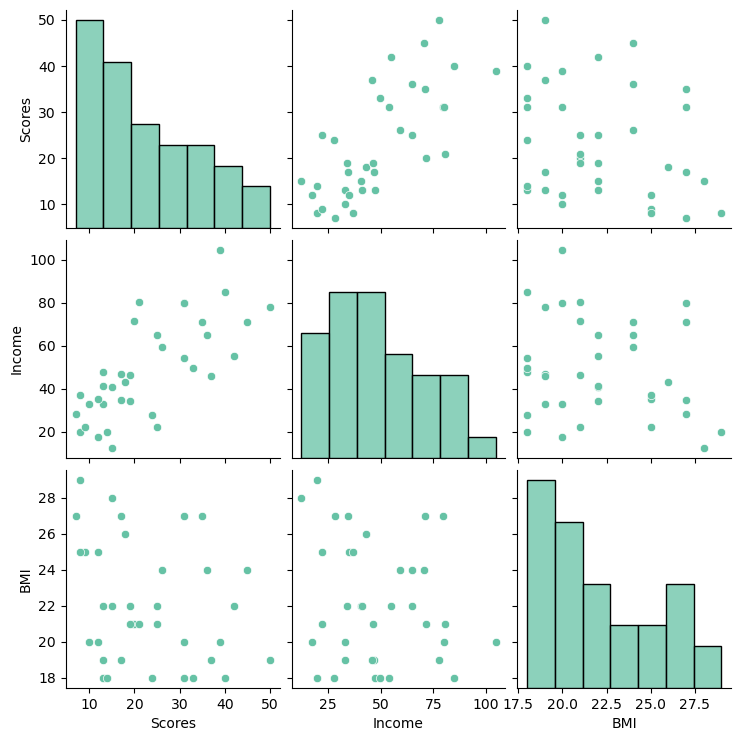

In [70]:
sns.pairplot(df, diag_kind="hist")

We can see that there does seem to be a linear relationship between the Income and scores, where as income and BMI do not appear correlated. The data do not appear to be normally distributed, but we can do more formal tests of this to be sure.

In [71]:
# Assumption testing:  Normality


import scipy.stats as stats

print("Income: ", stats.normaltest(df.Income))
print("BMI: ", stats.normaltest(df.BMI))
print("Scores: ", stats.normaltest(df.Scores))

# p > alpha (0.05), accept the null hypothesis. The distribution of variables is normal.

Income:  NormaltestResult(statistic=1.8694971178536874, pvalue=0.392684590154046)
BMI:  NormaltestResult(statistic=5.135141170153041, pvalue=0.0767217080617244)
Scores:  NormaltestResult(statistic=3.517920062610699, pvalue=0.172223878164023)


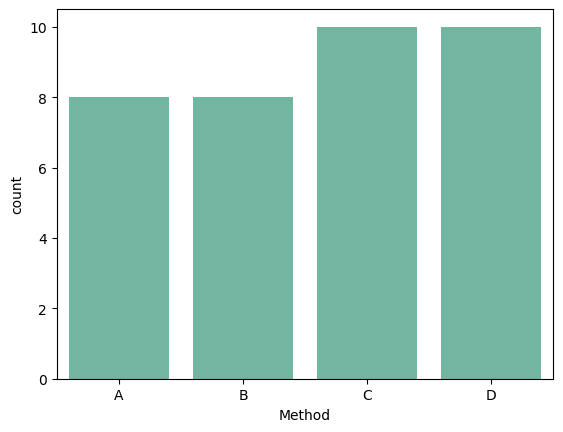

In [72]:
import seaborn as sns

ax = sns.countplot(x=df.Method)

# Unequal sizes of each treatment group

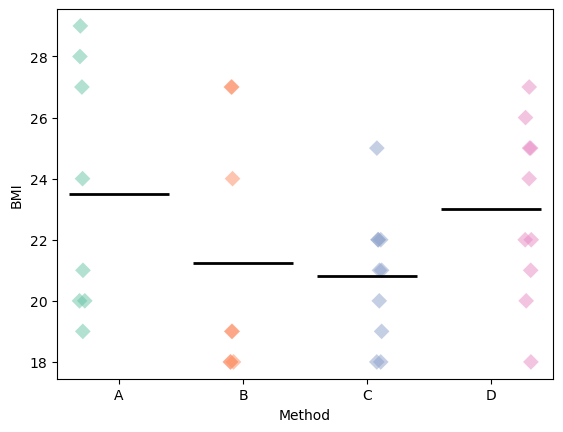

In [73]:
# Assumption testing: Equal variance

import matplotlib.pyplot as plt

p = sns.stripplot(
    x=df.Method, y=df.BMI, dodge=True, size=8, marker="D", alpha=0.5, hue=df.Method
)

sns.boxplot(  # This draws a line at the mean of each group
    showmeans=True,
    meanline=True,
    meanprops={"color": "k", "ls": "-", "lw": 2},
    medianprops={"visible": False},
    whiskerprops={"visible": False},
    zorder=10,
    x="Method",
    y="BMI",
    data=df,
    showfliers=False,
    showbox=False,
    showcaps=False,
    ax=p,
)
plt.show()

The groups seem to have roughly similar variance. Approximately the same number of values above and below the mean marker

In [74]:
pg.ancova(data=df, dv="Scores", covar=["Income", "BMI"], between="Method")

,Source,SS,DF,F,p-unc,np2
0,Method,552.284043,3,3.232550,0.036113,0.244288
1,Income,1573.952434,1,27.637304,0.000011,0.479504
2,BMI,60.013656,1,1.053790,0.312842,0.033934
3,Residual,1708.508657,30,NaN,NaN,NaN


* `SS` is the sum of squares
* `Df` is the degrees of freedome
* `F` is the F statistic or the parameter being estimated
* `P-unc` is the uncorrected p value
* `np2` is the  partial eta squared or the effect size

In the above example, the effect size of the method explains 24.42% of the variance in the scores,
and income explains 47.95%, both have significant p values. and BMI does not have a significant p value and so doesn't play a role.

This means that the effect size of method of teaching is only about half of the effect size of the income.

About 27% of the remaining effect is unexplained. so there are probably other factors that we have not measured or theorized about that are causing this heterogeneity.

Note that we have not answered the question which type of method of teaching is the best. This is done using an anova if there are more than  2 groups, and a student's t-test if there are two. 

There is no non-parametric test that adjusts for covariates

## Other tests

### Shapiro-wilk

- This is a test of normality of data
- where non parametric tests are not useful or to understand the data better.
- The statistic by itself cannot be interpreted, the p-value is calculated using montecarlo and interpretation is based on that.

The null-hypothesis of this test is that the population **is normally distributed**.

So if the p value is less than the chosen alpha level, then there is evidence that the data are **not** normally distributed.

This is useful when the sample n is < 5000

Caveats:

- When the sample size is small, the test may not have enough power to make an accurate prediction. So you get false negative that the data is normal

- When the data is large, even a few large outliers can cause a false positive that the data is not normal.

- Very few, if any, real world data are perfectly normal. linear models generally involve the assumption that their residuals i.e., the differences between observed and predicted values are normally distribted.

- Most of the time we are trying to predict the mean, and not the extremes, and so it doesn't really matter, because in large samples the means will be normally distributed(central limit theorum).

- Non Parametric tests are robust to outliers and large sample sizes, and are a good alternative when there is ambiguity about the normality of the data.

Read More:
1. [Shatz, I. Assumption-checking rather than (just) testing: The importance of visualization and effect size in statistical diagnostics. Behav Res 56, 826–845 (2024). https://doi.org/10.3758/s13428-023-02072-x](https://link.springer.com/article/10.3758/s13428-023-02072-x)

In [75]:
import pandas as pd
from scipy.stats import shapiro

df = pd.read_csv("mann-whitney-eva-data.csv")

In [76]:
shapiro(df["BDI_Sunday"])

# Since the p is lesser than the alpha, the data are not normally distributed

ShapiroResult(statistic=0.7481864947430416, pvalue=0.000160534418300268)

In [77]:
df_t = pd.read_csv("paired_t_bp.csv")

In [78]:
df_t.head()

,base_bp,post_drg_bp
0,125.4,98.3
1,118.9,116.8
2,93.5,96.0
3,131.2,114.4
4,120.7,118.7


In [79]:
stats.shapiro(df_t["base_bp"][:500])

# p > alpha, reject null hypothesis. sample is normal.

ShapiroResult(statistic=0.9954274847935575, pvalue=0.15032071619683773)